In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

def expand_array(short_array):
    long_array = np.zeros(63001)  # Create a zero array of the desired size

    # Assign values at the correct positions
    long_array[np.arange(251) * (251 + 1)] = short_array
    return long_array

with open("Proper_London_Patch_Populations_1_5km_fixed.pkl", "rb") as file:
    pop_dict = pickle.load(file)
short_pop_vector = np.array(list(pop_dict.values()))
pop_vector = expand_array(short_pop_vector)
    
with open("London Borough List.pkl", 'rb') as f:
    borough_list = pickle.load(f)

with open("London Station Connections Dict.pkl", 'rb') as f:
    station_connections = pickle.load(f)
    
with open("London Station List.pkl", "rb") as file:
    station_list = pickle.load(file)
    
with open("London Station Borough List.pkl", 'rb') as f:
    station_borough_list = pickle.load(f)
    
with open("Proper London Station Borough Proportions Dict.pkl", 'rb') as f:
    props_dict = pickle.load(f)

with open("London Condensed P Matrix.pkl", "rb") as file:
    sparse_p = pickle.load(file)

p_matrix = sparse_p.toarray()
Nj = pop_vector @ p_matrix
    
with open("London Valid Patch Indices.pkl", 'rb') as f:
    valid_patch_indices = pickle.load(f)

with open("Distributed Updated Final Formalized London Beta.pkl", "rb") as file:
    best_beta_yet0 = pickle.load(file)

with open("final_best_gamma.pkl", "rb") as file:
    best_gamma = pickle.load(file)[0]
    
with open("London Home Patch Indices.pkl", "rb") as file:
    home_patches = pickle.load(file)

travel_patches = []
for i in valid_patch_indices:
    if i not in home_patches:
        travel_patches.append(i)
        

def expand_concise_betas(home_patches,travel_patches,concise_beta):
    long_beta = np.zeros(63001)
    for i in range(251):
        long_beta[home_patches[i]] = concise_beta[i]
    long_beta[travel_patches] = concise_beta[-1]
    
    return long_beta

best_beta_yet = expand_concise_betas(home_patches,travel_patches,best_beta_yet0)

home_betas = best_beta_yet[home_patches]


In [31]:
station_connections

{'Acton Town': 4,
 'Aldgate': 2,
 'Aldgate East': 3,
 'Alperton': 2,
 'Angel': 2,
 'Archway': 2,
 'Arnos Grove': 2,
 'Arsenal': 2,
 'Baker Street': 6,
 'Balham': 2,
 'Bank & Monument': 7,
 'Barbican': 2,
 'Barking': 2,
 'Barkingside': 2,
 'Barons Court': 3,
 'Bayswater': 2,
 'Becontree': 2,
 'Belsize Park': 2,
 'Bermondsey': 2,
 'Bethnal Green': 2,
 'Blackfriars': 2,
 'Blackhorse Road': 2,
 'Bond Street': 4,
 'Borough': 2,
 'Boston Manor': 2,
 'Bounds Green': 2,
 'Bow Road': 2,
 'Brent Cross': 2,
 'Brixton': 1,
 'Bromley-by-Bow': 2,
 'Burnt Oak': 2,
 'Caledonian Road': 2,
 'Camden Town': 4,
 'Canada Water': 2,
 'Canary Wharf': 2,
 'Canning Town': 2,
 'Cannon Street': 2,
 'Canons Park': 2,
 'Chalk Farm': 2,
 'Chancery Lane': 2,
 'Charing Cross': 3,
 'Chigwell': 2,
 'Chiswick Park': 2,
 'Clapham Common': 2,
 'Clapham North': 2,
 'Clapham South': 2,
 'Cockfosters': 1,
 'Colindale': 2,
 'Colliers Wood': 2,
 'Covent Garden': 2,
 'Croxley': 1,
 'Dagenham East': 2,
 'Dagenham Heathway': 2,
 '

In [2]:
with open("London Formatted Paths.pkl", "rb") as file:
    paths = pickle.load(file)

with open("London Unique Patches.pkl", 'rb') as f:
    valid_patches = pickle.load(f)


def get_relatives(station_name):
    station_index = station_list.index(station_name)
    
    relatives = [(station_name,station_name)]
    for i in range(251):
        current_path = paths[station_index][i]
        if len(current_path) != 1:
            path = current_path[1]
            if path not in relatives:
                relatives.append(path)
            
    return relatives
            
def get_relative_indices(station_name):
    relatives = get_relatives(station_name)
    output = []
    for i in relatives:
        station1 = i[0]
        station2 = i[1]
        output.append(valid_patches.tolist().index([station1,station2]))
    return output

get_relative_indices("Acton Town")

[0, 1, 37, 264, 344]

In [4]:
home_betas.shape

(251,)

In [8]:
p_matrix.shape

(63001, 63001)

In [10]:
pop_vector.shape

(63001,)

In [6]:
N = pop_vector.copy()
gamma = 1/5

def calc_F_for_idx(i):
    F = 0
    
    for k in range(251):
        p_k = home_patches[k]
        denom = 0
        for l in range(251):
            p_l = home_patches[l]
            denom += p_matrix[p_l][p_k]
        F += home_betas[k]*p_matrix[i][p_k]*p_matrix[i][p_k]/denom
    
    return F

calc_F_for_idx(0)

np.float64(0.3181925168301477)

In [17]:
patch_R0s = []
for i in range(251):
    patch_R0s.append(calc_F_for_idx(home_patches[i])/gamma)
patch_R0s = np.array(patch_R0s)
patch_R0s

array([1.59096258, 1.6240618 , 1.26968781, 1.98907424, 1.41521072,
       1.65599009, 1.67869846, 1.87574748, 1.25459611, 1.79506733,
       0.75368235, 1.52310932, 1.26295568, 1.72235821, 1.56951116,
       1.79728845, 1.79841851, 1.65186139, 1.98159196, 1.37670727,
       1.4401468 , 1.46843932, 1.1524602 , 1.94215122, 1.73909368,
       1.7243362 , 1.48765233, 1.73036056, 1.65932344, 1.49388973,
       1.65017425, 1.78312458, 1.32586933, 1.56233329, 0.89525503,
       1.32893496, 1.63568363, 2.17377512, 1.69576236, 1.35979983,
       1.36455791, 1.76294743, 1.75719984, 1.99014022, 2.05248502,
       1.9955653 , 1.74697939, 1.59975885, 1.80325036, 1.50121517,
       1.70248925, 1.80074452, 1.70252765, 2.09492821, 1.32957449,
       1.65661809, 1.3617227 , 1.68734791, 1.66801937, 1.46159533,
       1.96853368, 1.62544946, 1.66216638, 1.76474552, 1.67720731,
       1.66226816, 1.58127415, 1.3603073 , 1.15744247, 1.31342279,
       1.74379223, 1.15435292, 1.60605944, 1.49144267, 1.33715

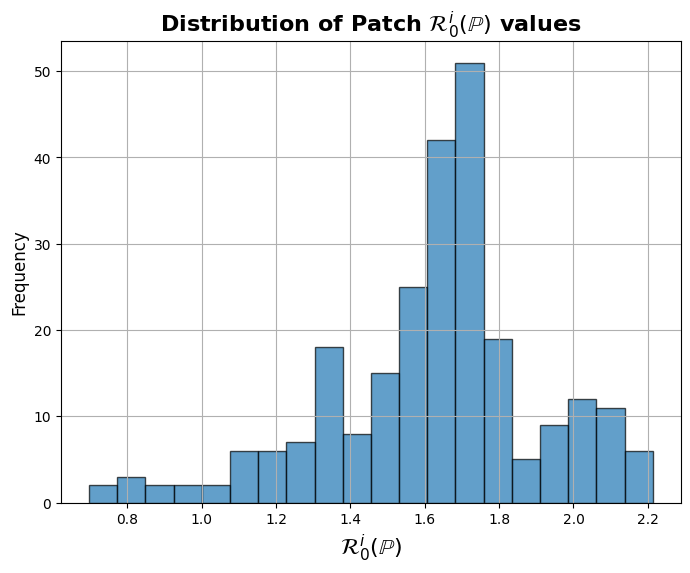

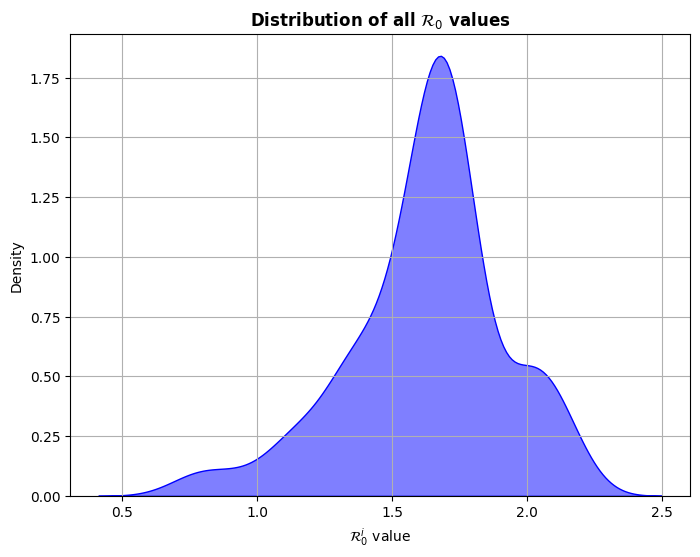

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_histogram(values, title="Histogram of $\\mathcal{R}_0$ Values"):
    """
    Plots a histogram of the values in the given dictionary.
    
    Parameters:
    - data_dict: dict, dictionary containing values to plot.
    - title: str, title of the plot.
    """
    
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel("$\\mathcal{R}^i_0(\\mathbb{P})$",fontsize=16)
    plt.ylabel("Frequency",fontsize=12)
    plt.title(title, fontweight='bold', fontsize=16)
    plt.grid(True)
    plt.show()

def plot_kde(values, title="KDE of $\\mathcal{R}_0$ Values"):
    """
    Plots a Kernel Density Estimate (KDE) plot of the values in the given dictionary.
    
    Parameters:
    - data_dict: dict, dictionary containing values to plot.
    - title: str, title of the plot.
    """
    
    plt.figure(figsize=(8, 6))
    sns.kdeplot(values, fill=True, color="blue", alpha=0.5)
    plt.xlabel("$\\mathcal{R}^i_0$ value")
    plt.ylabel("Density")
    plt.title(title,fontweight='bold')
    plt.grid(True)
    plt.show()

# Example usage:
plot_histogram(patch_R0s, title="Distribution of Patch $\\mathcal{R}^i_0(\\mathbb{P})$ values")
plot_kde(patch_R0s, title="Distribution of all $\\mathcal{R}_0$ values")

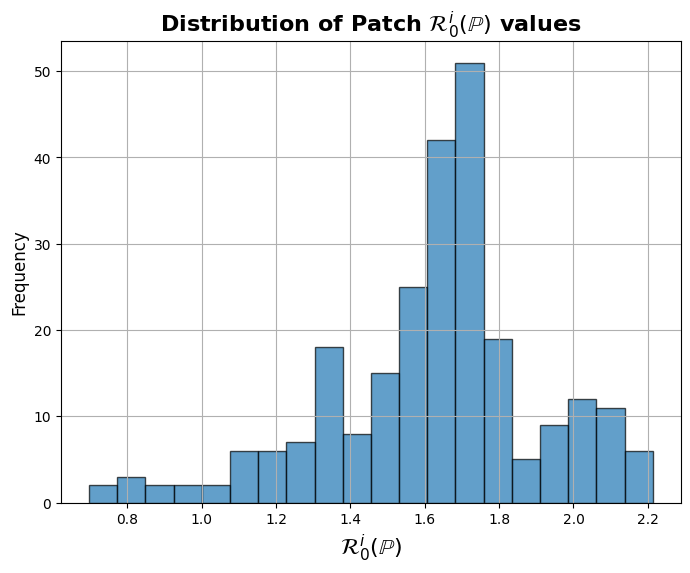

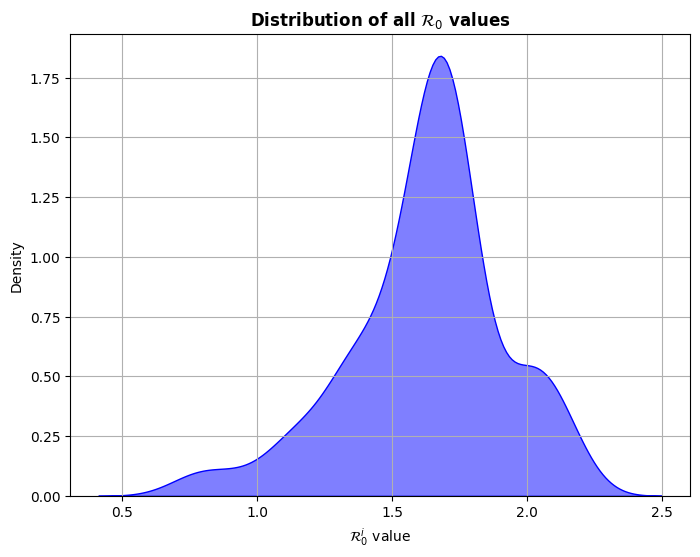

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_histogram(values, title="Histogram of $\\mathcal{R}_0$ Values"):
    """
    Plots a histogram of the values in the given dictionary.
    
    Parameters:
    - data_dict: dict, dictionary containing values to plot.
    - title: str, title of the plot.
    """
    
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel("$\\mathcal{R}^i_0(\\mathbb{P})$",fontsize=16)
    plt.ylabel("Frequency",fontsize=12)
    plt.title(title, fontweight='bold', fontsize=16)
    plt.grid(True)
    plt.show()

def plot_kde(values, title="KDE of $\\mathcal{R}_0$ Values"):
    """
    Plots a Kernel Density Estimate (KDE) plot of the values in the given dictionary.
    
    Parameters:
    - data_dict: dict, dictionary containing values to plot.
    - title: str, title of the plot.
    """
    
    plt.figure(figsize=(8, 6))
    sns.kdeplot(values, fill=True, color="blue", alpha=0.5)
    plt.xlabel("$\\mathcal{R}^i_0$ value")
    plt.ylabel("Density")
    plt.title(title,fontweight='bold')
    plt.grid(True)
    plt.show()

# Example usage:
plot_histogram(patch_R0s, title="Distribution of Patch $\\mathcal{R}^i_0(\\mathbb{P})$ values")
plot_kde(patch_R0s, title="Distribution of all $\\mathcal{R}_0$ values")

In [7]:
full_connections = np.zeros(63001)

for i in range(63001):
    if i in home_patches:
        full_connections[i] = station_connections[station_list[list(home_patches).index(i)]]
    if i in travel_patches:
        full_connections[i] = 2

new_fc = []
for i in range(63001):
    if full_connections[i] != 0:
        new_fc.append(full_connections[i])
        
full_connections = np.array(new_fc)

connections_array = np.array(list(station_connections.values()))


In [ ]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"Connections": connections_array, "$\\mathcal{R}^i_0(\\mathbb{P})$": patch_R0s})

plt.figure(figsize=(8,6))
sns.boxplot(x="Connections", y="$\\mathcal{R}^i_0(\\mathbb{P})$", data=df)
sns.stripplot(x="Connections", y="$\\mathcal{R}^i_0(\\mathbb{P})$", data=df, color="black", alpha=0.5, jitter=True)
plt.xlabel("# of Connections",fontsize=12)
plt.ylabel("Value of $\\mathcal{R}^i_0(\\mathbb{P})$",fontsize=16)
plt.title("Distribution of $\\mathcal{R}^i_0(\\mathbb{P})$ values by # of Connections",fontweight="bold",fontsize=16)
plt.show()


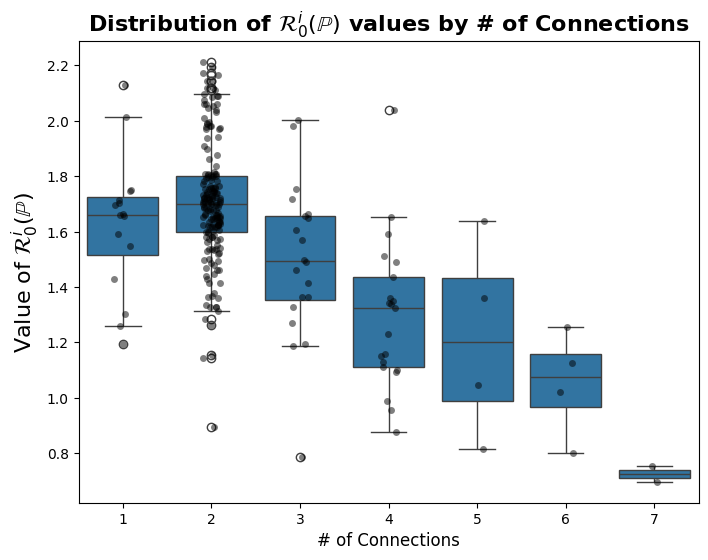

In [9]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"Connections": connections_array, "$\\mathcal{R}^i_0(\\mathbb{P})$": patch_R0s})

plt.figure(figsize=(8,6))
sns.boxplot(x="Connections", y="$\\mathcal{R}^i_0(\\mathbb{P})$", data=df)
sns.stripplot(x="Connections", y="$\\mathcal{R}^i_0(\\mathbb{P})$", data=df, color="black", alpha=0.5, jitter=True)
plt.xlabel("# of Connections",fontsize=12)
plt.ylabel("Value of $\\mathcal{R}^i_0(\\mathbb{P})$",fontsize=16)
plt.title("Distribution of $\\mathcal{R}^i_0(\\mathbb{P})$ values by # of Connections",fontweight="bold",fontsize=16)
plt.show()


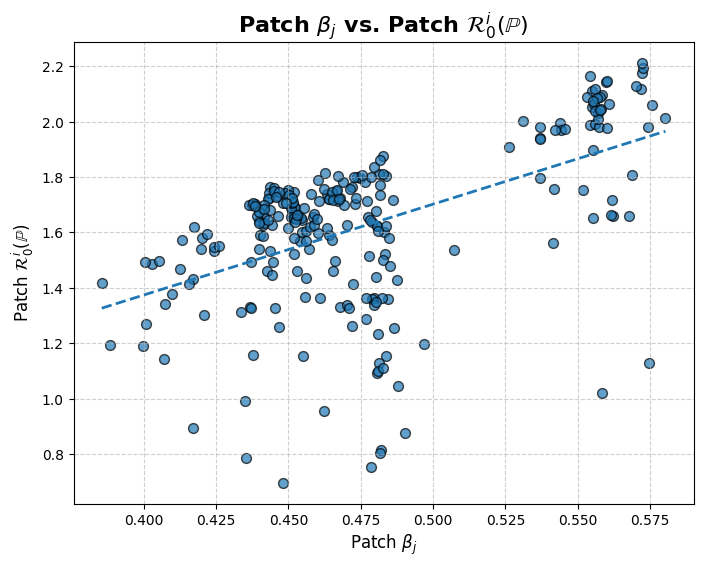

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Fit a line
coeffs = np.polyfit(home_betas, patch_R0s, deg=1)
trendline = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(home_betas, patch_R0s, s=50, alpha=0.7, edgecolors='black')
plt.plot(np.sort(home_betas), trendline(np.sort(home_betas)), linestyle='--', linewidth=2)  # Trend line

# Labels and title
plt.xlabel("Patch $\\beta_j$", fontsize=12)
plt.ylabel("Patch $\\mathcal{R}^i_0(\\mathbb{P})$", fontsize=12)
plt.title("Patch $\\beta_j$ vs. Patch $\\mathcal{R}^i_0(\\mathbb{P})$", fontsize=16, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


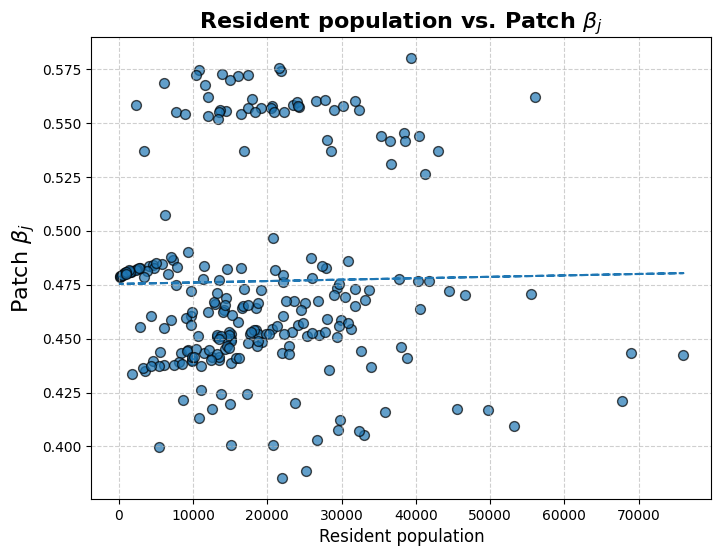

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(short_pop_vector, home_betas, s=50, alpha=0.7, edgecolors='black')

# Trend line
m, b = np.polyfit(short_pop_vector, home_betas, 1)
plt.plot(short_pop_vector, m * np.array(short_pop_vector) + b, linestyle='--')

# Labels and title
plt.xlabel("Resident population", fontsize=12)
plt.ylabel(f"Patch $\\beta_j$", fontsize=16)
plt.title(f"Resident population vs. Patch $\\beta_j$", fontsize=16, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [27]:
with open("London P Populations.pkl", "rb") as file:
    p_populations = pickle.load(file)


commuters_vs_residents = []
for i in range(251):
    residents = np.sum(p_populations[i])
    col_sum = np.sum(p_populations.T[i])
    commuters = col_sum - p_populations[i][i]
    commuters_vs_residents.append(commuters/residents)
commuters_vs_residents = np.array(commuters_vs_residents)
commuters_vs_residents

array([5.97066278e-01, 1.36752305e+01, 1.93020251e+00, 4.40891768e-01,
       1.25706713e+00, 5.33863280e-01, 3.98878442e-01, 2.20956692e-01,
       7.43721481e+00, 5.65358843e-01, 8.11503075e+02, 2.72070255e+00,
       8.42831859e-01, 2.41952978e-01, 7.10054236e-01, 1.09908376e+00,
       2.93968653e-01, 3.24136075e-01, 1.92875362e-01, 6.87416630e-01,
       2.33328807e+01, 3.66299432e-01, 7.80094583e+00, 2.90542757e-01,
       3.04230380e-01, 2.40114813e-01, 6.87346173e-01, 2.35224142e-01,
       2.27848790e-01, 4.06170769e-01, 3.51341003e-01, 6.03516764e-01,
       1.78180673e+00, 2.70269035e-01, 2.75972153e+00, 5.74770064e-01,
       5.86496486e+01, 2.59271058e-01, 3.87446125e-01, 7.01469697e+00,
       5.80541923e+01, 2.08623679e-01, 3.88096974e-01, 1.20106299e-01,
       1.31109827e-01, 2.52149540e-01, 2.84081334e-01, 3.97680600e-01,
       2.11937511e-01, 7.71931568e+00, 3.02360796e-01, 3.62034648e-01,
       4.62190982e-01, 2.97696787e-01, 1.36961648e+00, 9.42201696e-01,
      

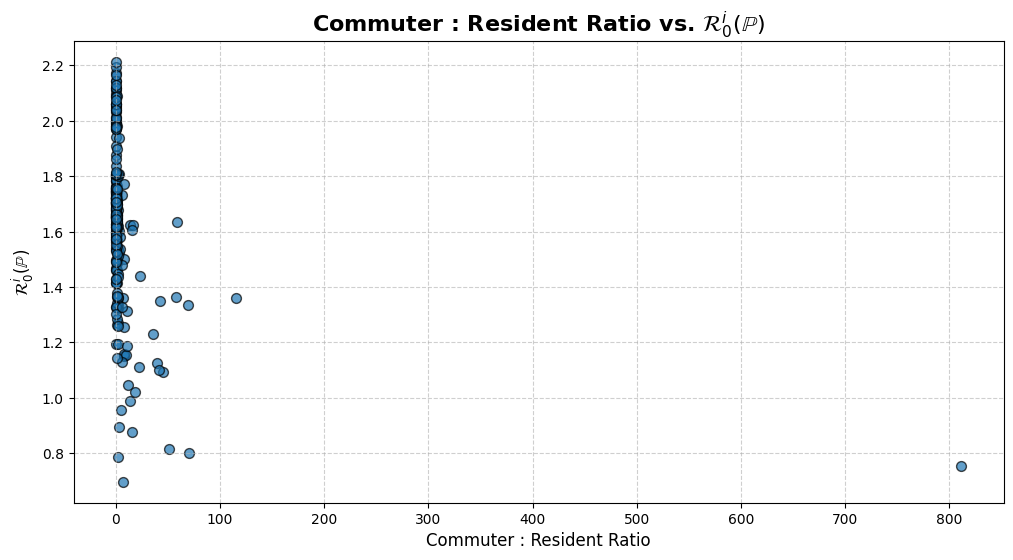

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
plt.scatter(commuters_vs_residents, patch_R0s, s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Commuter : Resident Ratio", fontsize=12)
plt.ylabel("$\\mathcal{R}^i_0(\\mathbb{P})$", fontsize=12)
plt.title("Commuter : Resident Ratio vs. $\\mathcal{R}^i_0(\\mathbb{P})$", fontsize=16, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


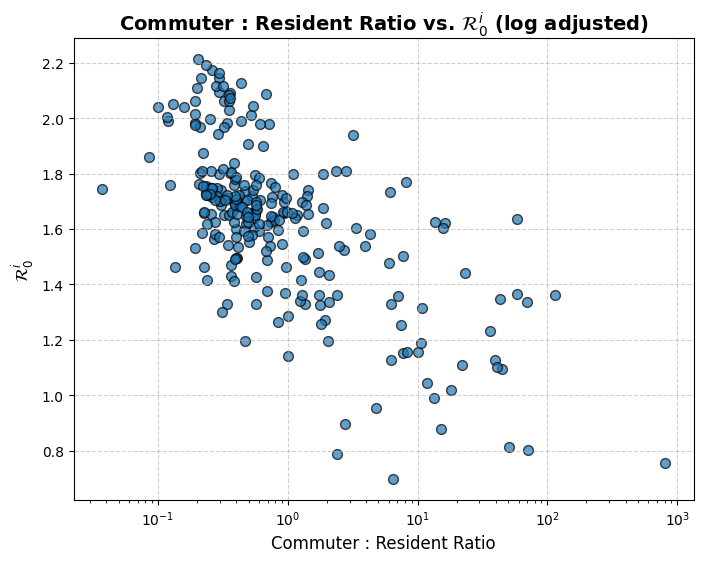

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(commuters_vs_residents, patch_R0s, s=50, alpha=0.7, edgecolors='black')

plt.xscale('log')  # Set x-axis to log scale

plt.xlabel("Commuter : Resident Ratio", fontsize=12)
plt.ylabel("$\\mathcal{R}^i_0$", fontsize=12)
plt.title("Commuter : Resident Ratio vs. $\\mathcal{R}^i_0$ (log adjusted)", fontsize=14, fontweight='bold')

plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


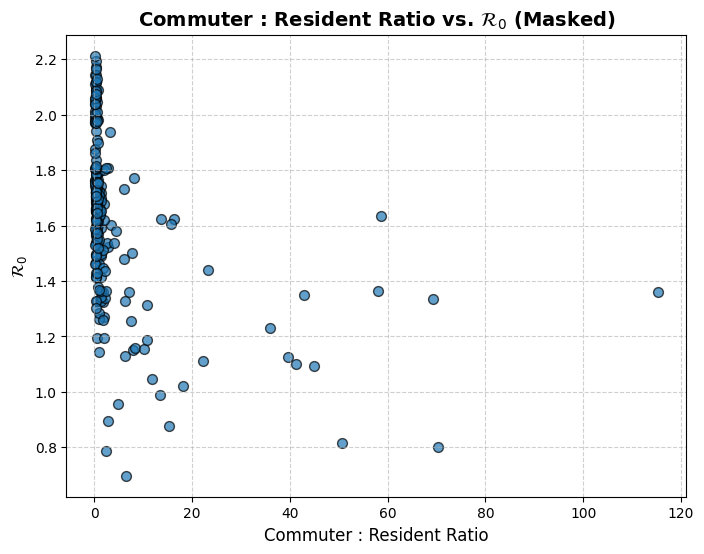

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to arrays if needed
commuters_vs_residents = np.array(commuters_vs_residents)
patch_R0s = np.array(patch_R0s)

# Mask to exclude the maximum x-value
mask = commuters_vs_residents != commuters_vs_residents.max()

plt.figure(figsize=(8, 6))
plt.scatter(commuters_vs_residents[mask], patch_R0s[mask], s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Commuter : Resident Ratio", fontsize=12)
plt.ylabel("$\\mathcal{R}_0$", fontsize=12)
plt.title("Commuter : Resident Ratio vs. $\\mathcal{R}_0$ (Masked)", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


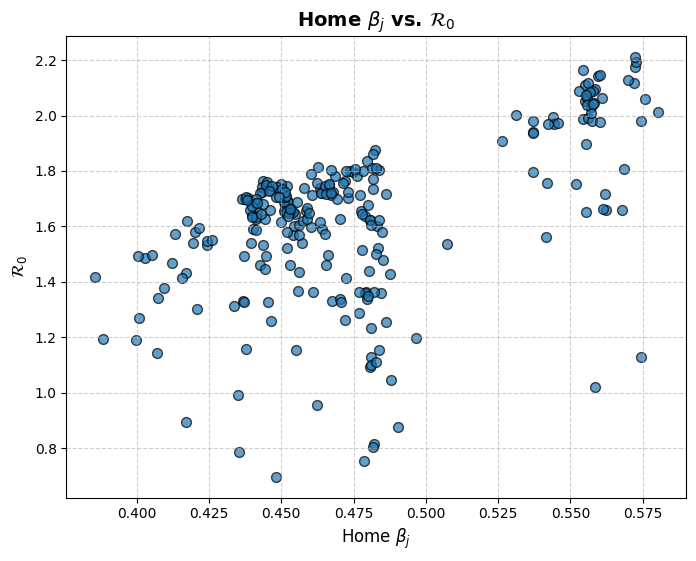

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(home_betas, patch_R0s, s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Home $\\beta_j$", fontsize=12)
plt.ylabel("$\\mathcal{R}_0$", fontsize=12)
plt.title("Home $\\beta_j$ vs. $\\mathcal{R}_0$", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


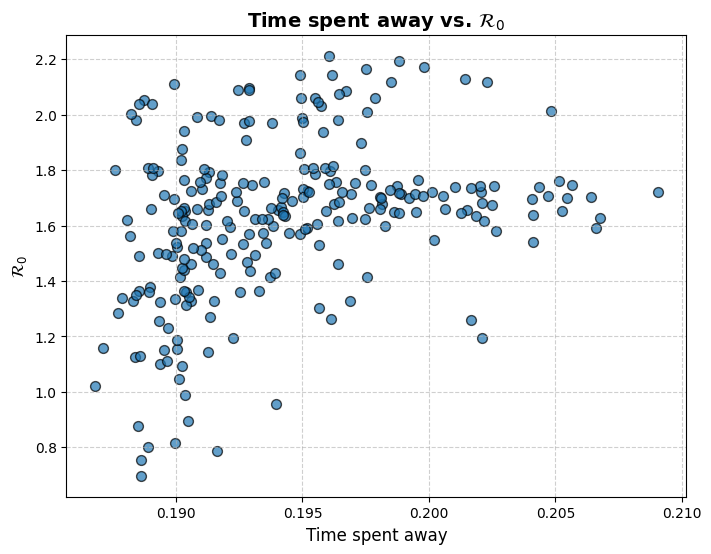

In [115]:
visitor_props = 1-np.diag(p_matrix)
visitor_props = visitor_props[home_patches]


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(visitor_props, patch_R0s, s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Time spent away", fontsize=12)
plt.ylabel("$\\mathcal{R}_0$", fontsize=12)
plt.title("Time spent away vs. $\\mathcal{R}_0$", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


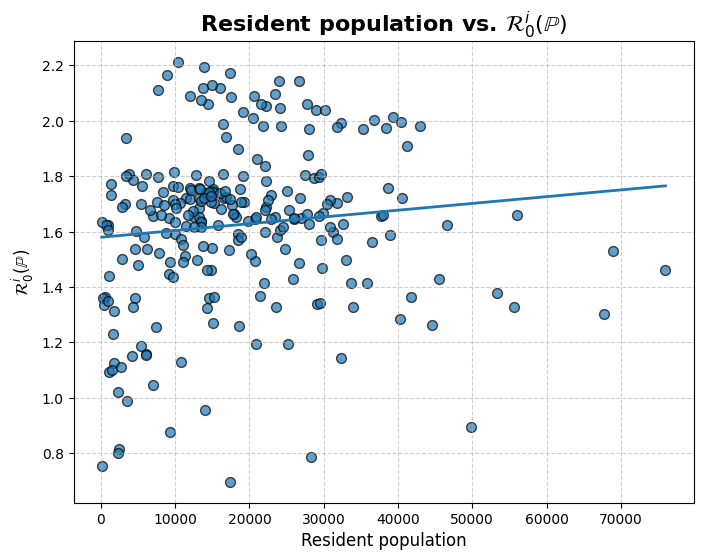

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(short_pop_vector, patch_R0s, s=50, alpha=0.7, edgecolors='black')

# Fit line
coeffs = np.polyfit(short_pop_vector, patch_R0s, 1)  # Linear fit (degree 1)
fit_line = np.poly1d(coeffs)
x_fit = np.linspace(min(short_pop_vector), max(short_pop_vector), 100)
plt.plot(x_fit, fit_line(x_fit), linestyle='-', linewidth=2)

# Labels and title
plt.xlabel("Resident population", fontsize=12)
plt.ylabel(r"$\mathcal{R}^i_0(\mathbb{P})$", fontsize=12)
plt.title(r"Resident population vs. $\mathcal{R}^i_0(\mathbb{P})$", fontsize=16, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


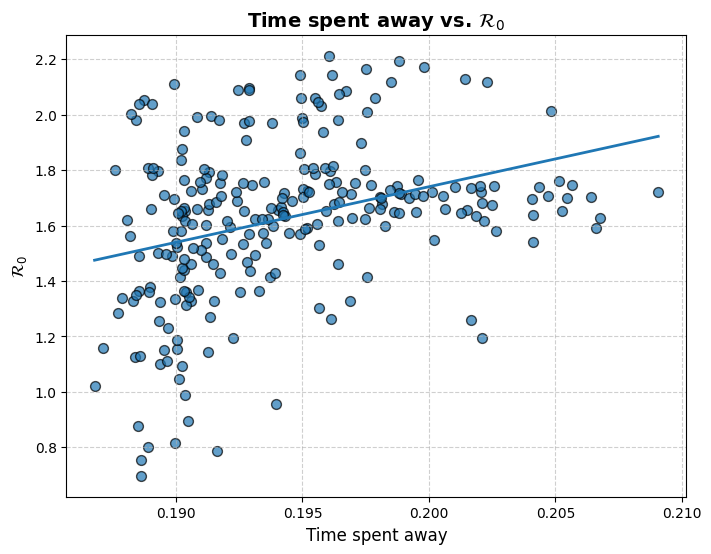

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
visitor_props = 1 - np.diag(p_matrix)
visitor_props = visitor_props[home_patches]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(visitor_props, patch_R0s, s=50, alpha=0.7, edgecolors='black')

# Fit line
coeffs = np.polyfit(visitor_props, patch_R0s, deg=1)
fit_line = np.poly1d(coeffs)
x_fit = np.linspace(visitor_props.min(), visitor_props.max(), 100)
plt.plot(x_fit, fit_line(x_fit), linestyle='-', linewidth=2)

# Labels and title
plt.xlabel("Time spent away", fontsize=12)
plt.ylabel("$\\mathcal{R}_0$", fontsize=12)
plt.title("Time spent away vs. $\\mathcal{R}_0$", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


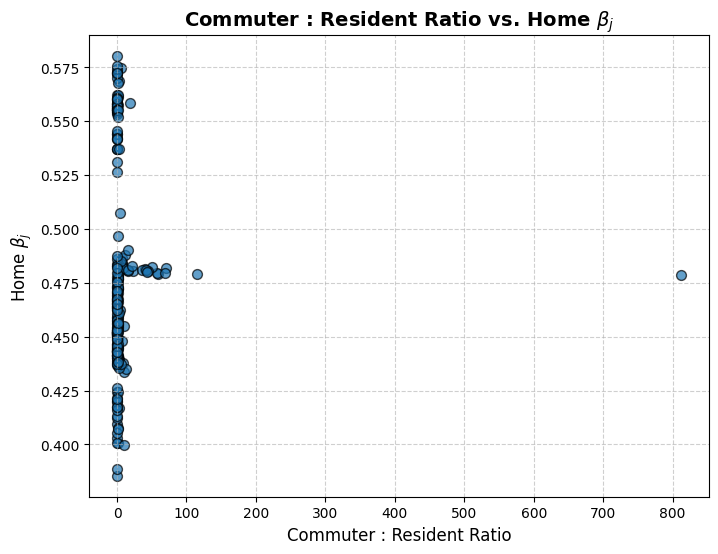

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(commuters_vs_residents, home_betas, s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Commuter : Resident Ratio", fontsize=12)
plt.ylabel("Home $\\beta_j$", fontsize=12)
plt.title("Commuter : Resident Ratio vs. Home $\\beta_j$", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


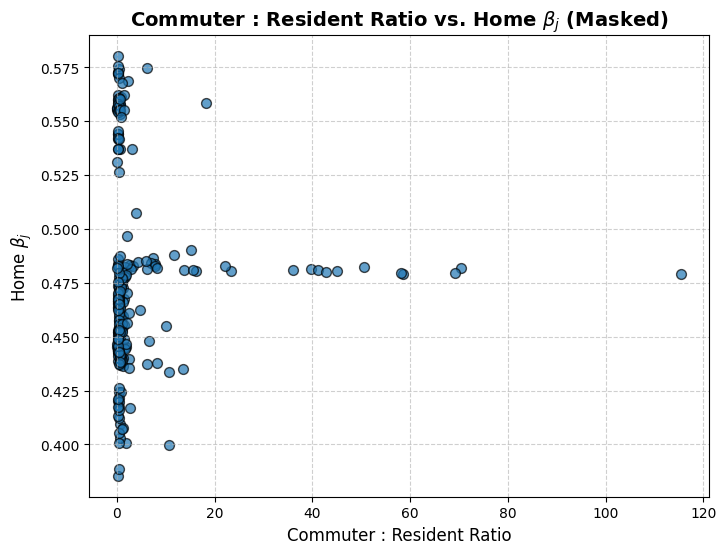

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(commuters_vs_residents[mask], home_betas[mask], s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Commuter : Resident Ratio", fontsize=12)
plt.ylabel("Home $\\beta_j$", fontsize=12)
plt.title("Commuter : Resident Ratio vs. Home $\\beta_j$ (Masked)", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


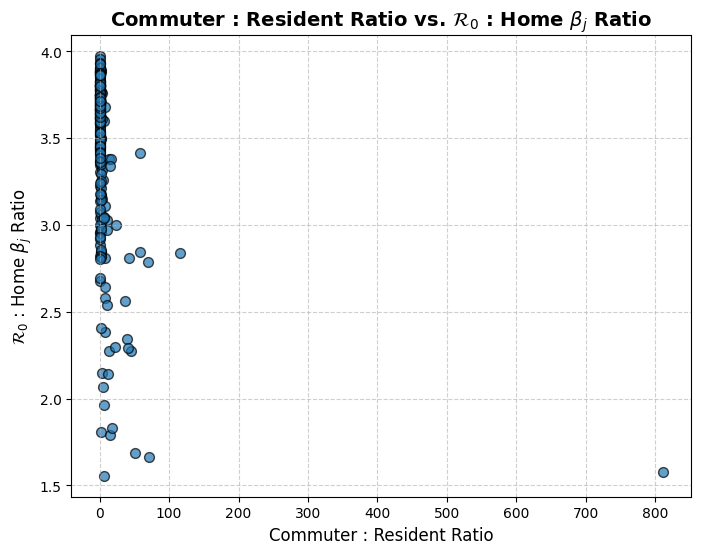

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(commuters_vs_residents, patch_R0s/home_betas, s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Commuter : Resident Ratio", fontsize=12)
plt.ylabel("$\\mathcal{R}_0$ : Home $\\beta_j$ Ratio", fontsize=12)
plt.title("Commuter : Resident Ratio vs. $\\mathcal{R}_0$ : Home $\\beta_j$ Ratio", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


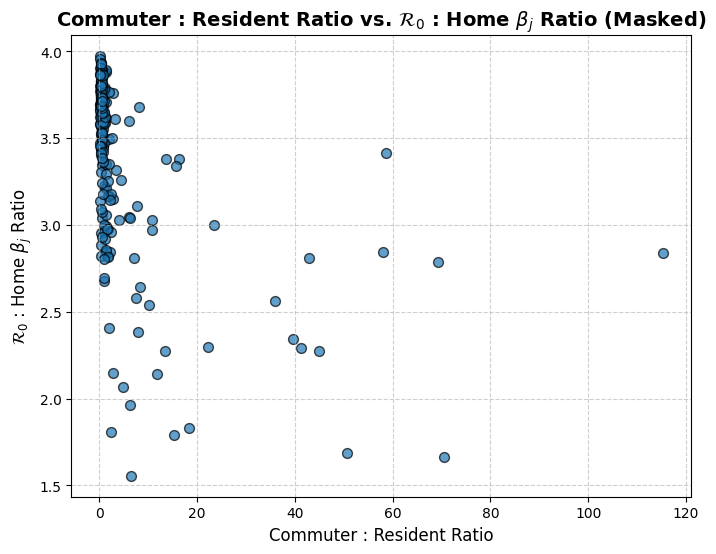

In [78]:
# Mask to exclude the maximum x-value
mask = commuters_vs_residents != commuters_vs_residents.max()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(commuters_vs_residents[mask], (patch_R0s/home_betas)[mask], s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Commuter : Resident Ratio", fontsize=12)
plt.ylabel("$\\mathcal{R}_0$ : Home $\\beta_j$ Ratio", fontsize=12)
plt.title("Commuter : Resident Ratio vs. $\\mathcal{R}_0$ : Home $\\beta_j$ Ratio (Masked)", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


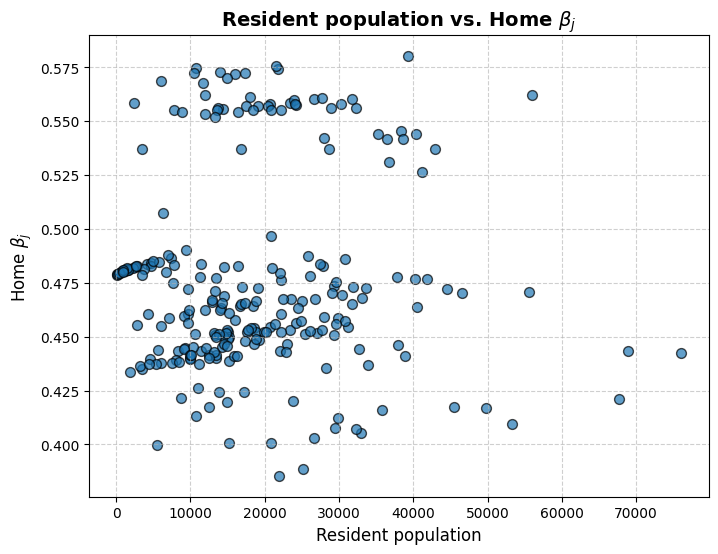

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(short_pop_vector, home_betas, s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Resident population", fontsize=12)
plt.ylabel("Home $\\beta_j$", fontsize=12)
plt.title("Resident population vs. Home $\\beta_j$", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


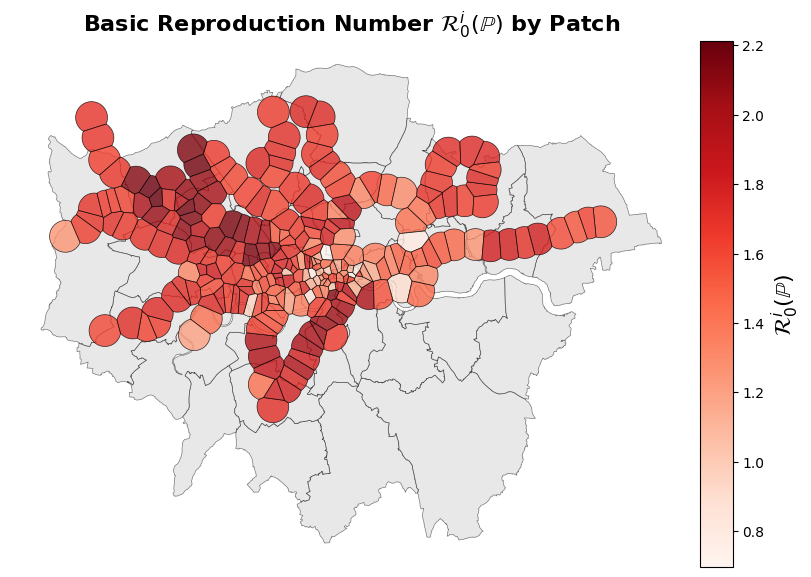

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

def plot_ratio_map(ratio, title="Basic Reproduction Number $\\mathcal{R}^i_0(\\mathbb{P})$ by Patch"):
    """
    Plots Voronoi patches of London colored by actual ratio values,
    with boroughs in the background and an adjusted colorbar.

    Parameters:
    - ratio: Array-like, raw ratio values.
    - title: Plot title.
    """
    # Load data
    voronoi_gdf = gpd.read_file("London_Voronoi_File_1_5km.shp")
    london_gdf = gpd.read_file("Complete London Shapefile.gpkg", layer="Combined_London_Data")

    # Ensure CRS match
    voronoi_gdf = voronoi_gdf.to_crs(london_gdf.crs)

    # Separate boroughs
    boroughs_gdf = london_gdf[london_gdf["type"] == "borough"]

    # Add actual ratio values
    voronoi_gdf["ratio"] = ratio

    # Plot setup
    fig, ax = plt.subplots(figsize=(12, 10))
    boroughs_gdf.plot(ax=ax, color="lightgrey", edgecolor="black", linewidth=0.5, alpha=0.5)

    # Colorbar axis
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=-2)

    # Create color map
    cmap = plt.cm.Reds
    norm = plt.Normalize(voronoi_gdf["ratio"].min(), voronoi_gdf["ratio"].max())

    # Plot Voronoi
    voronoi_gdf.plot(
        ax=ax,
        column="ratio",
        cmap=cmap,
        edgecolor="black",
        linewidth=0.5,
        alpha=0.8
    )

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label("$\\mathcal{R}^i_0(\\mathbb{P})$", fontsize=16)

    ax.set_title(title, fontweight='bold', fontsize=16)
    ax.axis("off")
    plt.show()

# Example usage:
plot_ratio_map(patch_R0s)

In [85]:
np.average(patch_R0s),np.median(patch_R0s),np.std(patch_R0s)

(np.float64(1.6252162540474206),
 np.float64(1.6566180926677216),
 np.float64(0.2867103461254492))

In [4]:
def expand_betas(short_betas,long_length):
    
    long_betas = np.zeros(long_length)
    index = 0
    for i in valid_patch_indices:
        long_betas[i] = short_betas[index]
        index += 1
    
    return long_betas

betas = best_beta_yet

gamma = 1/5
R0_basic = betas/gamma

In [9]:
R0_basic

array([1.92839265, 0.        , 0.        , ..., 0.        , 0.        ,
       2.00390123])

In [10]:
R0_final = np.array(63001)

for i in tqdm(range(63001),desc="Running"):
    sigma = 0
    
    for j in range(63001):
        second_sum = 0
        for k in range(63001):
            second_sum += p_matrix[k][j]
        sigma += p_matrix[i][j]*(betas[j]/betas[i])*(p_matrix[i][j]/second_sum)
    
    R0_final[i] = R0_basic[i]*sigma

R0_final

Running:   0%|          | 0/63001 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [18]:
R0_final.shape

(63001,)

In [ ]:
plt.scatter(Nj[travel_patches],travel_patch_R0s.values(),edgecolor="black")

In [7]:
betas[:100]

array([0.4219592 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.42481873, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.42481873, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
import numpy as np
from tqdm import tqdm

N = 63001  # Define the size

R0_final = np.zeros(N)

# Precompute second_sum for each column j
second_sum = np.sum(p_matrix, axis=0)  # Sum over k

# Avoid division by zero in second_sum
second_sum_safe = np.where(second_sum == 0, 1, second_sum)  # Replace zeros with 1

# Avoid division by zero in betas
betas_safe = np.where(betas == 0, 1, betas)  # Replace zeros with 1

# Compute sigma efficiently using matrix operations
sigma_matrix = (p_matrix * (betas_safe / betas_safe[:, np.newaxis]) * (p_matrix / second_sum_safe))

# Sum over all j
sigma = np.sum(sigma_matrix, axis=1)




In [35]:
# with open("R0_final_with_R.pkl", "wb") as f:
    # pickle.dump(R0_final, f)

In [12]:
# Compute final result
R0_final = R0_basic * sigma

In [13]:
R0_final

array([1.32243675, 0.        , 0.        , ..., 0.        , 0.        ,
       1.52239473])

In [5]:
# Assuming station_list is given
num_stations = len(station_list)

# Create dictionary with keys as pairs of station names
R0_dict = {}

# Counter to track position in R0_final
index = 0

for i in range(num_stations):
    for j in range(num_stations):
        if index < len(R0_final):
            R0_dict[(station_list[i], station_list[j])] = R0_final[index]
            index += 1
        else:
            break  # Stop if we exceed R0_final length



            

NameError: name 'R0_final' is not defined

In [12]:
best_beta_yet.shape

(251,)

In [16]:
# Assuming station_list is given
num_stations = len(station_list)
# best_beta_yet = best_beta_yet[home_patches]
# Create dictionary with keys as pairs of station names
beta_dict = {}

# Counter to track position in R0_final
index = 0

for i in range(num_stations):
    if index < len(best_beta_yet):
        beta_dict[station_list[i]] = best_beta_yet[i]
        index += 1
    else:
        break  # Stop if we exceed R0_final length




In [15]:
beta_dict

{'Acton Town': np.float64(0.3856785305276654),
 'Aldgate': np.float64(0.4180658367146505),
 'Aldgate East': np.float64(0.34285317305136465),
 'Alperton': np.float64(0.48380562265732246),
 'Angel': np.float64(0.410040840537657),
 'Archway': np.float64(0.41397704285776693),
 'Arnos Grove': np.float64(0.39709311961001803),
 'Arsenal': np.float64(0.4165625559757248),
 'Baker Street': np.float64(0.42092663203777747),
 'Balham': np.float64(0.4602531499206932),
 'Bank & Monument': np.float64(0.4173421908721895),
 'Barbican': np.float64(0.41688209860344516),
 'Barking': np.float64(0.4049119272500182),
 'Barkingside': np.float64(0.372546570789276),
 'Barons Court': np.float64(0.4005323653982385),
 'Bayswater': np.float64(0.409016117457954),
 'Becontree': np.float64(0.4051524658583599),
 'Belsize Park': np.float64(0.36948643720841357),
 'Bermondsey': np.float64(0.45770749692964574),
 'Bethnal Green': np.float64(0.35091188329705314),
 'Blackfriars': np.float64(0.417987654638971),
 'Blackhorse Roa

In [17]:
len(list(all_R0_dict.values()))

837

In [17]:
# Remove entries with value 0
all_R0_dict = {k: v for k, v in R0_dict.items() if v != 0}

# Sort dictionary by values in descending order (highest first)
sorted_items = sorted(all_R0_dict.items(), key=lambda x: x[1], reverse=True)

# Get top 10 highest values
top_10_highest = sorted_items[:10]

# Get top 10 lowest values
top_10_lowest = sorted_items[-10:]

# Output results
print("Top 10 highest values:")
for key, value in top_10_highest:
    print(f"{key}: {value}")

print("\nTop 10 lowest values:")
for key, value in top_10_lowest:
    print(f"{key}: {value}")


Top 10 highest values:

Top 10 lowest values:


In [18]:
# Remove entries with value 0
all_beta_dict = {k: v for k, v in beta_dict.items() if v != 0}

# Sort dictionary by values in descending order (highest first)
sorted_items = sorted(all_beta_dict.items(), key=lambda x: x[1], reverse=True)

# Get top 10 highest values
top_10_highest = sorted_items[:10]

# Get top 10 lowest values
top_10_lowest = sorted_items[-10:]

# Output results
print("Top 10 highest values:")
for key, value in top_10_highest:
    print(f"{key}: {value}")

print("\nTop 10 lowest values:")
for key, value in top_10_lowest:
    print(f"{key}: {value}")


Top 10 highest values:
Harrow & Wealdstone: 0.5833118338423973
Canons Park: 0.5746978197983215
South Harrow: 0.5735754996369652
West Harrow: 0.5720867610243643
Rayners Lane: 0.5713537879604861
North Harrow: 0.5709784490091879
London Bridge: 0.5708870600386621
Pinner: 0.56969721353699
Stanmore: 0.5680684464742684
Brixton: 0.5660857922001798

Top 10 lowest values:
Bow Road: 0.4055703471953231
Whitechapel: 0.4055317723129808
Latimer Road: 0.404996368583758
Bromley-by-Bow: 0.4027146656531913
Mile End: 0.4020371106487607
Aldgate East: 0.40136926327745087
Stepney Green: 0.40077011468535195
Tower Hill: 0.39736183227742494
Kew Gardens: 0.38686890882803987
Richmond: 0.38381442959153034


In [18]:
home_patch_R0s = {}

for i in range(251):
    current_station = station_list[i]
    home_patch_R0s[(current_station,current_station)] = all_R0_dict[(current_station,current_station)]

home_patch_R0s

{('Acton Town', 'Acton Town'): np.float64(1.3224367477052912),
 ('Aldgate', 'Aldgate'): np.float64(1.4121963424748856),
 ('Aldgate East', 'Aldgate East'): np.float64(1.0864908714625472),
 ('Alperton', 'Alperton'): np.float64(1.7363984988975618),
 ('Angel', 'Angel'): np.float64(1.2282562394912175),
 ('Archway', 'Archway'): np.float64(1.4352452294805202),
 ('Arnos Grove', 'Arnos Grove'): np.float64(1.4769466366935835),
 ('Arsenal', 'Arsenal'): np.float64(1.6192196097247409),
 ('Baker Street', 'Baker Street'): np.float64(1.0857935361842161),
 ('Balham', 'Balham'): np.float64(1.5386039623306818),
 ('Bank & Monument', 'Bank & Monument'): np.float64(0.6573945522140645),
 ('Barbican', 'Barbican'): np.float64(1.3135327712976679),
 ('Barking', 'Barking'): np.float64(1.083451103616556),
 ('Barkingside', 'Barkingside'): np.float64(1.4472796368023124),
 ('Barons Court', 'Barons Court'): np.float64(1.3845693841536972),
 ('Bayswater', 'Bayswater'): np.float64(1.5486042873756758),
 ('Becontree', 'Bec

In [19]:
travel_patch_R0s = {}

for patch in list(all_R0_dict.keys()):
    if patch not in list(home_patch_R0s.keys()):
        travel_patch_R0s[patch] = all_R0_dict[patch]
        
travel_patch_R0s

{('Acton Town', 'Chiswick Park'): np.float64(1.8769360610090304),
 ('Acton Town', 'Ealing Common'): np.float64(1.8656757384789813),
 ('Acton Town', 'South Ealing'): np.float64(1.85328064991076),
 ('Acton Town', 'Turnham Green'): np.float64(1.850185221312078),
 ('Aldgate', 'Liverpool Street'): np.float64(1.8744319207308022),
 ('Aldgate', 'Tower Hill'): np.float64(1.8777458495802095),
 ('Aldgate East', 'Liverpool Street'): np.float64(1.874074141266548),
 ('Aldgate East', 'Tower Hill'): np.float64(1.8699597385802669),
 ('Aldgate East', 'Whitechapel'): np.float64(1.8691367728027506),
 ('Alperton', 'Park Royal'): np.float64(1.866654895574234),
 ('Alperton', 'Sudbury Town'): np.float64(1.87126043858785),
 ('Angel', "King's Cross St. Pancras"): np.float64(1.861037787763939),
 ('Angel', 'Old Street'): np.float64(1.8619311176148963),
 ('Archway', 'Highgate'): np.float64(1.8592161092753505),
 ('Archway', 'Tufnell Park'): np.float64(1.870907231026024),
 ('Arnos Grove', 'Bounds Green'): np.float64

In [23]:
full_connections = np.zeros(63001)

for i in range(63001):
    if i in home_patches:
        full_connections[i] = station_connections[station_list[list(home_patches).index(i)]]
    if i in travel_patches:
        full_connections[i] = 2

new_fc = []
for i in range(63001):
    if full_connections[i] != 0:
        new_fc.append(full_connections[i])
        
full_connections = np.array(new_fc)

connections_array = np.array(list(station_connections.values()))


In [5]:
np.median(full_connections),np.average(full_connections)

(np.float64(2.0), np.float64(2.100358422939068))

In [12]:
connections_array.shape

(251,)

In [19]:
home_betas = best_beta_yet[home_patches]

In [27]:
best_beta_yet[valid_patch_indices]

array([0.46400659, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

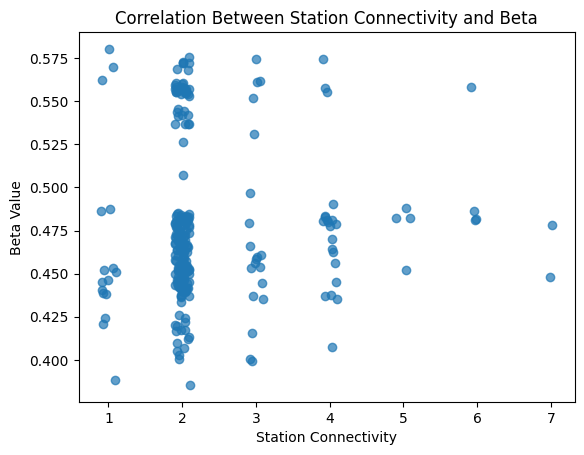

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Jitter function
def add_jitter(arr, scale=0.1):
    return arr + np.random.uniform(-scale, scale, arr.shape)

jittered_connections = add_jitter(connections_array)

plt.scatter(jittered_connections,home_betas, alpha=0.7)
plt.xlabel("Station Connectivity")
plt.ylabel("Beta Value")
plt.title("Correlation Between Station Connectivity and Beta")
plt.show()


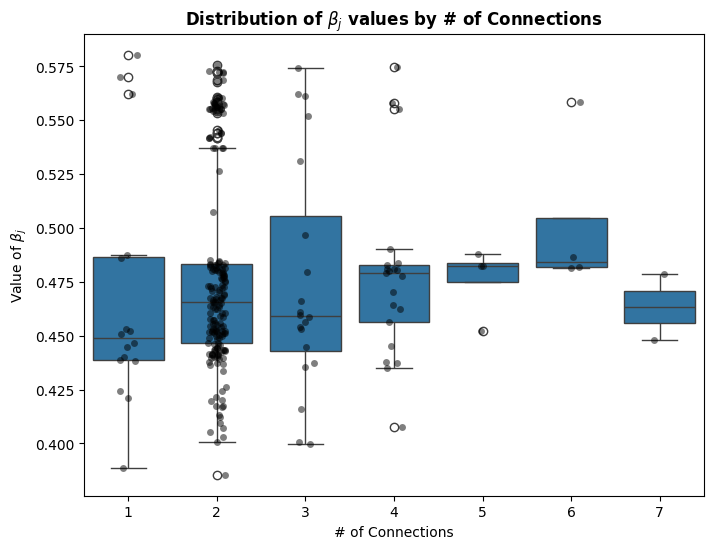

In [10]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"Connections": connections_array, "Beta": home_betas})

plt.figure(figsize=(8,6))
sns.boxplot(x="Connections", y="Beta", data=df)
sns.stripplot(x="Connections", y="Beta", data=df, color="black", alpha=0.5, jitter=True)
plt.xlabel("# of Connections")
plt.ylabel("Value of $\\beta_j$")
plt.title("Distribution of $\\beta_j$ values by # of Connections",fontweight="bold")
plt.show()


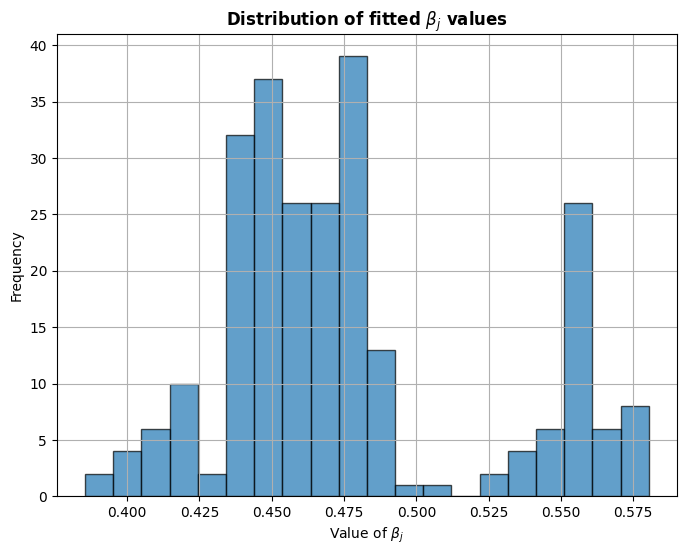

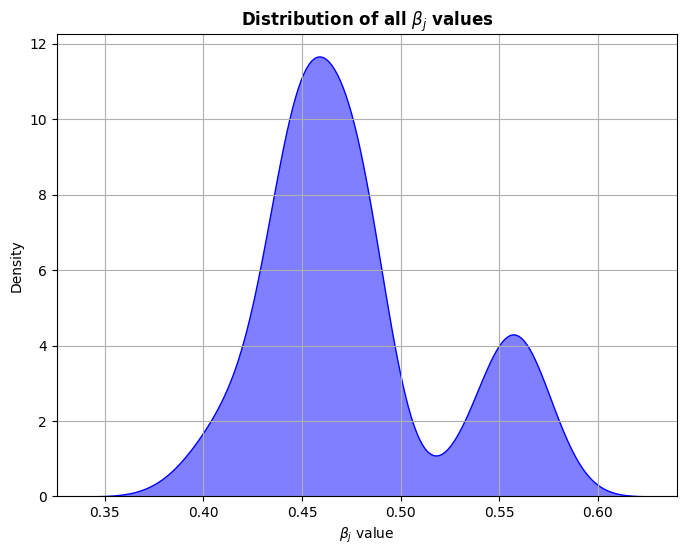

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_histogram(values, title="Histogram of Beta Values"):
    """
    Plots a histogram of the values in the given dictionary.
    
    Parameters:
    - data_dict: dict, dictionary containing values to plot.
    - title: str, title of the plot.
    """
    
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel("Value of $\\beta_j$")
    plt.ylabel("Frequency")
    plt.title(title, fontweight='bold')
    plt.grid(True)
    plt.show()

def plot_kde(values, title="KDE of Beta Values"):
    """
    Plots a Kernel Density Estimate (KDE) plot of the values in the given dictionary.
    
    Parameters:
    - data_dict: dict, dictionary containing values to plot.
    - title: str, title of the plot.
    """
    
    plt.figure(figsize=(8, 6))
    sns.kdeplot(values, fill=True, color="blue", alpha=0.5)
    plt.xlabel("$\\beta_j$ value")
    plt.ylabel("Density")
    plt.title(title,fontweight='bold')
    plt.grid(True)
    plt.show()

# Example usage:
plot_histogram(home_betas, title="Distribution of fitted $\\beta_j$ values")
plot_kde(home_betas, title="Distribution of all $\\beta_j$ values")

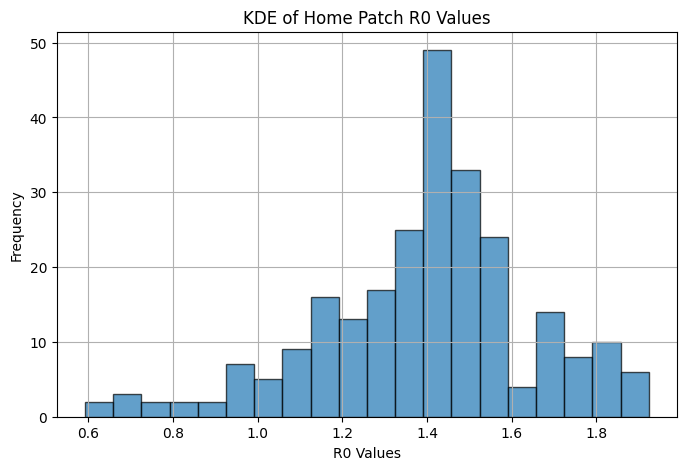

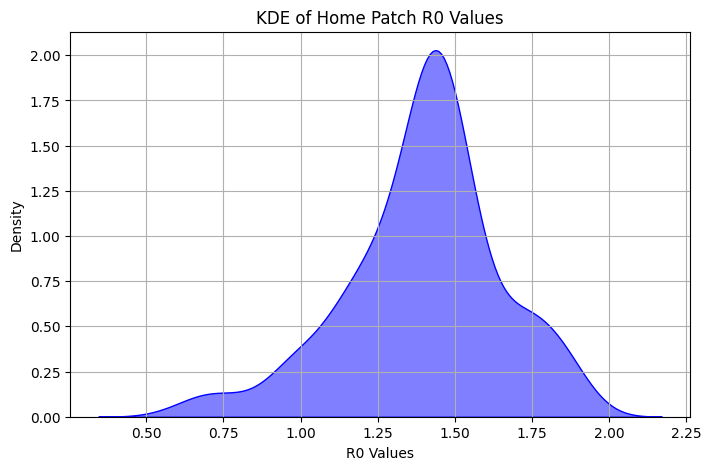

In [28]:
plot_histogram(home_patch_R0s, title="KDE of Home Patch R0 Values")
plot_kde(home_patch_R0s, title="KDE of Home Patch R0 Values")

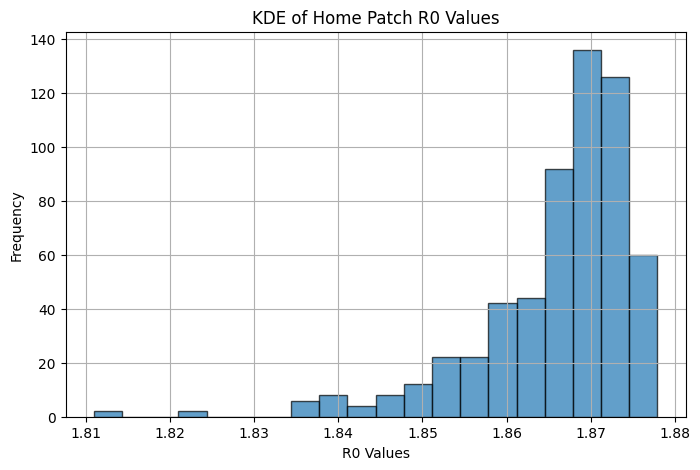

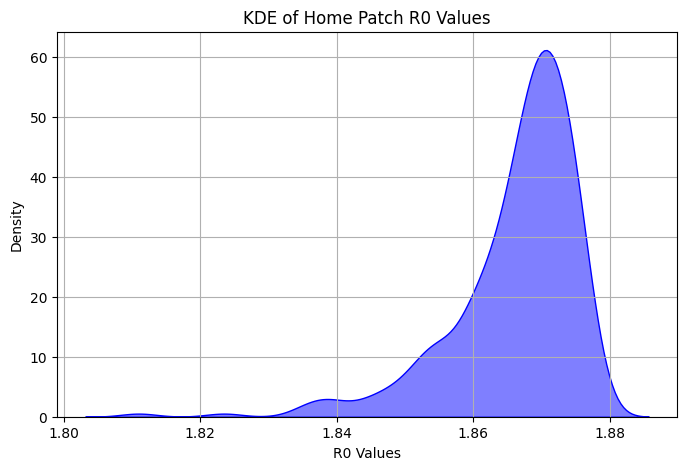

In [29]:
plot_histogram(travel_patch_R0s, title="KDE of Home Patch R0 Values")
plot_kde(travel_patch_R0s, title="KDE of Home Patch R0 Values")

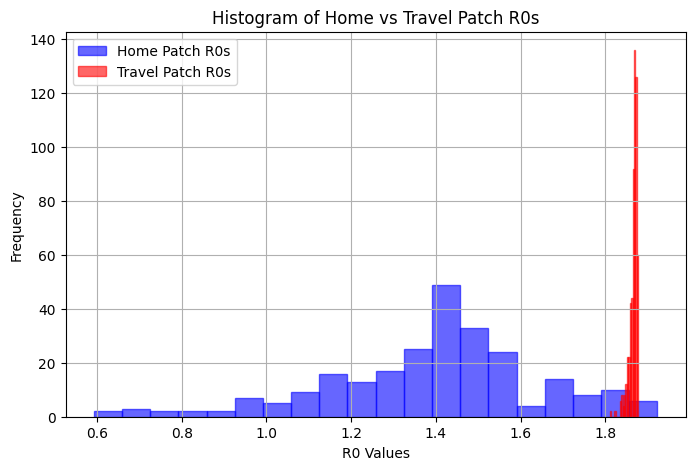

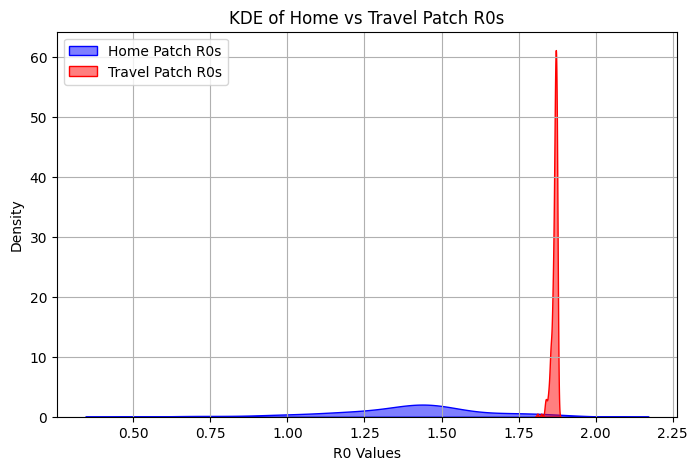

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_overlayed_histogram(home_dict, travel_dict, title="Overlayed Histogram of Beta Values"):
    """
    Plots an overlayed histogram of the values in the two given dictionaries.
    
    Parameters:
    - home_dict: dict, dictionary containing first dataset.
    - travel_dict: dict, dictionary containing second dataset.
    - title: str, title of the plot.
    """
    home_values = list(home_dict.values())
    travel_values = list(travel_dict.values())

    plt.figure(figsize=(8, 5))
    plt.hist(home_values, bins=20, alpha=0.6, color='blue', label="Home Patch R0s", edgecolor="blue")
    plt.hist(travel_values, bins=20, alpha=0.6, color='red', label="Travel Patch R0s", edgecolor="red")
    
    plt.xlabel("Beta Values")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_overlayed_kde(home_dict, travel_dict, title="Overlayed KDE of R0 Values"):
    """
    Plots an overlayed KDE plot of the values in the two given dictionaries.
    
    Parameters:
    - home_dict: dict, dictionary containing first dataset.
    - travel_dict: dict, dictionary containing second dataset.
    - title: str, title of the plot.
    """
    home_values = np.array(list(home_dict.values()))
    travel_values = np.array(list(travel_dict.values()))

    plt.figure(figsize=(8, 5))
    sns.kdeplot(home_values, fill=True, alpha=0.5, color="blue", label="Home Patch R0s")
    sns.kdeplot(travel_values, fill=True, alpha=0.5, color="red", label="Travel Patch R0s")

    plt.xlabel("R0 Values")
    plt.ylabel("Density")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage:
plot_overlayed_histogram(home_patch_R0s, travel_patch_R0s, title="Histogram of Home vs Travel Patch R0s")
plot_overlayed_kde(home_patch_R0s, travel_patch_R0s, title="KDE of Home vs Travel Patch R0s")


In [27]:
import numpy as np
import pandas as pd

def compute_summary_statistics(data_dict):
    """
    Computes and prints summary statistics for a given dictionary.
    
    Parameters:
    - data_dict: dict, dictionary containing numerical values.
    
    Returns:
    - A dictionary with computed statistics.
    """
    values = np.array(list(data_dict.values()))
    
    summary_stats = {
        "Count": len(values),
        "Mean": np.mean(values),
        "Median": np.median(values),
        "Standard Deviation": np.std(values, ddof=1),
        "Minimum": np.min(values),
        "Maximum": np.max(values),
        "25th Percentile (Q1)": np.percentile(values, 25),
        "75th Percentile (Q3)": np.percentile(values, 75),
        "Interquartile Range (IQR)": np.percentile(values, 75) - np.percentile(values, 25)
    }

    return summary_stats

# Compute statistics for all three datasets
home_stats = compute_summary_statistics(all_beta_dict)
# travel_stats = compute_summary_statistics(travel_patch_R0s)
# filtered_stats = compute_summary_statistics(all_R0_dict)

# Convert to a DataFrame for better visualization
stats_df = pd.DataFrame([home_stats], 
                        index=["Home Patch Betas"])

stats_df

,Count,Mean,Median,Standard Deviation,Minimum,Maximum,25th Percentile (Q1),75th Percentile (Q3),Interquartile Range (IQR)
Home Patch Betas,251,0.409727,0.402911,0.041599,0.327299,0.50414,0.380333,0.419242,0.038909


In [32]:
with open("combined_travel_times.pkl", 'rb') as f:
    travel_times = pickle.load(f)

In [33]:
R0s_vs_travel_times = np.zeros([586,2])

for i in range(586):
    patch = list(travel_patch_R0s.keys())[i]
    R0s_vs_travel_times[i][0] = travel_times[patch]
    R0s_vs_travel_times[i][1] = travel_patch_R0s[patch]
    
R0s_vs_travel_times

array([[2.        , 1.87693606],
       [2.5       , 1.86567574],
       [4.        , 1.85328065],
       ...,
       [3.        , 1.86934038],
       [3.        , 1.87253797],
       [1.        , 1.8753614 ]])

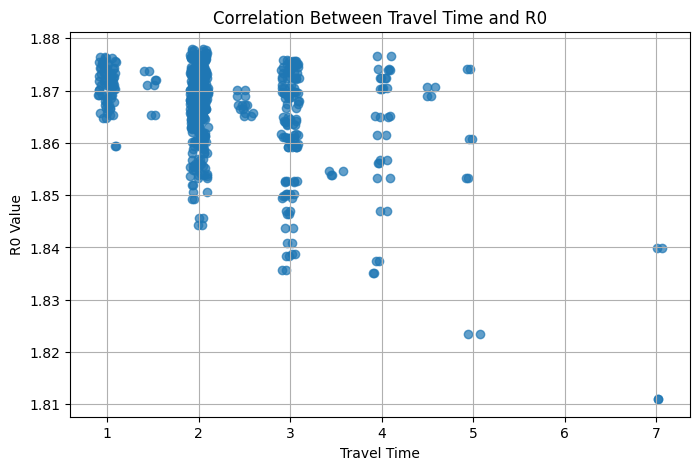

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Jitter function
def add_jitter(arr, scale=0.1):
    return arr + np.random.uniform(-scale, scale, arr.shape)

# Extracting R0 values and travel times
travel_times = R0s_vs_travel_times[:, 0]  # First column (X-axis)
R0_values = R0s_vs_travel_times[:, 1]     # Second column (Y-axis)

# Add jitter to travel times
jittered_travel_times = add_jitter(travel_times, scale=0.1)

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(jittered_travel_times, R0_values, alpha=0.7)
plt.xlabel("Travel Time")
plt.ylabel("R0 Value")
plt.title("Correlation Between Travel Time and R0")
plt.grid(True)
plt.show()


In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert array to DataFrame
df = pd.DataFrame({
    "Travel Time": R0s_vs_travel_times[:, 0],  # First column (connectivity levels)
    "R0": R0s_vs_travel_times[:, 1]           # Second column (R0 values)
})

# Create the plot
plt.figure(figsize=(8,6))
sns.boxplot(x="Travel Time", y="R0", data=df)
sns.stripplot(x="Travel Time", y="R0", data=df, color="black", alpha=0.5, jitter=True)
plt.xlabel("Travel Time")
plt.ylabel("R0 Value")
plt.title("Travel Patch R0 Distribution by Travel Time",fontweight="bold")
plt.show()


NameError: name 'R0s_vs_travel_times' is not defined

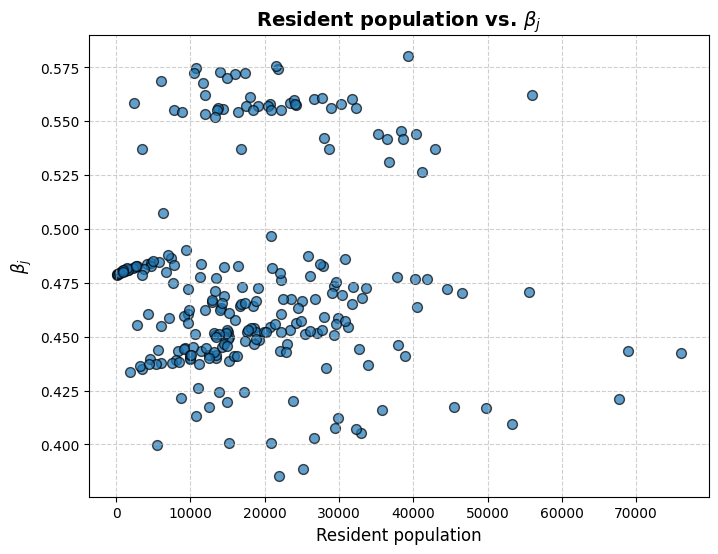

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(short_pop_vector, home_betas, s=50, alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel("Resident population", fontsize=12)
plt.ylabel("$\\beta_j$", fontsize=12)
plt.title("Resident population vs. $\\beta_j$", fontsize=14, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


In [29]:
alphas = np.ones(63001)*(1/5)


def making_NGM(p_matrix,N_array,betas,alphas):
    size = betas.shape[0]  # 63001 for full London system
    NGM = np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            N_div_a = 1/alphas[j]
            k_sum = 0
            for k in range(size):
                l_sum = 0
                for l in range(size):
                    l_sum += N_array[l]*p_matrix[l][k]
                
                k_sum += betas[k]*p_matrix[i][k]*p_matrix[j][k]/l_sum
            NGM[i][j] = k_sum*N_div_a
    return NGM

NGM = making_NGM(p_matrix,pop_vector,betas,alphas)
NGM

In [10]:
ngm_betas = np.zeros(63001)
ngm_betas[home_patches] = best_beta_yet[:251]
ngm_betas[travel_patches] = best_beta_yet[-1]
ngm_betas.shape

(63001,)

In [11]:
gammas = np.ones(63001)*(1/5)

import numpy as np
from scipy.sparse import csr_matrix
from tqdm import tqdm

def making_NGM(sparse_p, N_array, betas, gammas):
    size = betas.shape[0]  

    print("Computing l_sums...")
    l_sums = sparse_p.T.dot(N_array)  # Efficient matrix-vector multiplication
    l_sums[l_sums == 0] = 1  # Avoid division by zero

    print("Computing k_sums...")
    k_sums = csr_matrix((size, size))  # Initialize sparse result matrix

    # Iterate over nonzero elements of sparse_p
    for k in tqdm(range(size), desc="Processing k_sums"):
        if l_sums[k] == 0:  # Skip empty columns
            continue
        k_sums += sparse_p[:, k].dot((betas[k] * sparse_p[:, k].T / l_sums[k]))

    print("Finalizing NGM computation...")
    NGM = (1 / gammas) * k_sums.toarray()  # Convert to dense if necessary

    print("NGM computation complete.")
    return NGM

NGM = making_NGM(sparse_p,pop_vector,ngm_betas,gammas)
NGM

Computing l_sums...
Computing k_sums...


Processing k_sums: 100%|██████████| 63001/63001 [03:01<00:00, 347.14it/s]


Finalizing NGM computation...
NGM computation complete.


array([[8.79130663e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.84868847e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.84868847e-09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.06983556e-07]])

In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(NGM)

# Print results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

In [12]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs

# Ensure NGM is stored efficiently in CSR format
NGM_sparse = csr_matrix(NGM)

# Compute only the largest 251 eigenvalues using shift-invert mode
eigenvalues, eigenvectors = eigs(NGM_sparse, k=1, which="LM", tol=1e-6)

print("Computed Top Eigenvalue:", eigenvalues)


Computed Top Eigenvalue: [2.31056622+0.j]


In [16]:
top_eig = 2.3105662154302955
top_eig

2.3105662154302955

In [19]:
np.max(patch_R0s)

np.float64(2.2131179090359656)

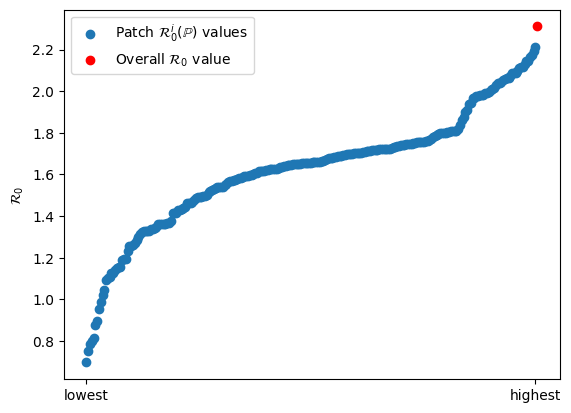

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sort R0s
sorted_indices = np.argsort(patch_R0s)
sorted_R0s = patch_R0s[sorted_indices]

# Find position of top_eig in sorted list
insert_pos = np.searchsorted(sorted_R0s, top_eig)

# Plot
plt.scatter(range(len(sorted_R0s)), sorted_R0s, label='Patch $\\mathcal{R}_0^i(\\mathbb{P})$ values')
plt.scatter(insert_pos, top_eig, color='red', label='Overall $\\mathcal{R}_0$ value')

# Customize x-axis
plt.xticks([0, len(sorted_R0s) - 1], ['lowest', 'highest'])
plt.xlabel('')
plt.ylabel('$\\mathcal{R}_0$')
plt.legend()
plt.show()


In [17]:
np.allclose(NGM, NGM_sparse.toarray(), atol=1e-10)


True